# $D_{s0}^{*}(2317)^+\to D_s^+\pi^0$ production study
## Selection efficiencies
### $D_{s0}^{*}(2317)^+\to D_s^+\pi^0$ decay
#### Calculation for each nVeloTrack bin with binomial approach

Iván Cambón Bouzas

Instituto Galego de Física de Altas Enerxías

Universidade de Santiago de Compostela



In [1]:
import ROOT
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import sys 
import os
import uncertainties as un
import pandas as pd
import mplhep
ROOT.EnableImplicitMT()
sys.path.append('/home3/ivan.cambon/Python_Modules/RooPyFit')
sys.path.append('/home3/ivan.cambon/Python_Modules/RooPyShort')
import RooPyFit as rpf
import RooPyShort as rsh

print(datetime.now())


plt.style.use(mplhep.style.LHCb2)

ROOT.gROOT.ProcessLine(".L lhcbStyle.C")
ROOT.lhcbStyle()

%jsroot on

Welcome to JupyROOT 6.26/06
2023-09-05 13:09:43.288598
-------------------------
Set LHCb Style - May 2021
-------------------------


In [ ]:
if not os.path.exists("./Graphs"):
    os.makedirs("./Graphs")
else:
    print("Graphs directory already exists")

root_files directory already exists


## RDataFrame definition

In [2]:
priv = False
Filt = False

if priv:
    MC_path = '/scratch42/ivan.cambon/DsJ_Spectroscopy/MC/Private/'
else:
    if Filt:
        MC_path = '/scratch42/ivan.cambon/DsJ_Spectroscopy/MC/Official/TightCut/'
    else:
        MC_path = '/scratch42/ivan.cambon/DsJ_Spectroscopy/MC/Official/DecProdCut/'
        
MC_Ds0_files = "Ds0DsPi0*.root"
MC_Ds1_files = "Ds1DsstPi0*.root"
dtt = "DsPi02ggTuple"

tdf_Ds0_raw = ROOT.RDataFrame(dtt+"/DecayTree", MC_path+MC_Ds0_files)
tdf_Ds0_raw = tdf_Ds0_raw.Define("Ds0M", "Ds0_M-Ds_M+1969-piz_M+135")
tdf_Ds0 = rsh.Ds0_TRUE_MM_def(tdf_Ds0_raw)

tdf_Ds1_raw = ROOT.RDataFrame(dtt+"/DecayTree", MC_path+"Ds1DsstPi0*.root")
tdf_Ds1_raw = tdf_Ds1_raw.Define("Ds0M", "Ds0_M-Ds_M+1969-piz_M+135")
tdf_Ds1 = rsh.Ds0_TRUE_MM_def(tdf_Ds1_raw)

## MCmatching and selection RDF

In [3]:
TRUEID = rsh.TRUEIDs()
TRUEID_dtt = TRUEID[dtt]

TRUEID_Ds0 = TRUEID_dtt["Ds0DsPi0"]
TRUEID_Ds1 = TRUEID_dtt["Ds1DsstPi0"]

pi0_pT_cut = "piz_PT > 1500"
pi0_window = "abs(piz_M - 135) < 15"
Ds_window = "abs(Ds_M - 1969) < 20"
sel = pi0_pT_cut+"&&"+pi0_window+"&&"+Ds_window

tdf_Ds0_sel = tdf_Ds0.Filter(TRUEID_Ds0+"&&"+sel)
tdf_Ds1_sel = tdf_Ds1.Filter(TRUEID_Ds1+"&&"+sel)

## nVeloTracks bins

In [4]:
VELO_cuts = ["nVeloTracks > 0 && nVeloTracks < 65"   , "nVeloTracks > 65 && nVeloTracks < 80",
             "nVeloTracks > 80 && nVeloTracks < 95"  , "nVeloTracks > 95 && nVeloTracks < 110",
             "nVeloTracks > 110 && nVeloTracks < 125", "nVeloTracks > 125 && nVeloTracks < 140",
             "nVeloTracks > 140 && nVeloTracks < 165", "nVeloTracks > 165 && nVeloTracks < 360"]

## Mass histograms

In [5]:
mass_hist_Ds0_sel = [tdf_Ds0_sel.Filter(VELO_cuts[i]).Histo1D(("","",100,2220,2440), "Ds0M") for i in range(len(VELO_cuts))]
mass_hist_Ds1_sel = [tdf_Ds1_sel.Filter(VELO_cuts[i]).Histo1D(("","",100,2220,2440), "Ds0M") for i in range(len(VELO_cuts))]

### Mass histogram plots

In [6]:
opt = 'same'
xlabel = "#it{M(D_{s}^{+}#pi^{0})} [MeV/c^{2}]"
ylabel = "N_{events}"
title = "#it{D_{s}^{+} #rightarrow K^{+}K^{-}#pi^{+}#pi^{0}} MonteCarlo (MC)"

for i in range(len(VELO_cuts)):
    c2 = ROOT.TCanvas(str(i), str(i), 800, 600)
    rsh.TH1D_plot(mass_hist_Ds0_sel[i], xlabe=xlabel, ylabel=ylabel, color=2, norm=True)
    rsh.TH1D_plot(mass_hist_Ds1_sel[i], xlabe=xlabel, ylabel=ylabel, color=4, norm=True)
    c2.Draw()


## $\varepsilon_{sel}$ calculations

In [7]:
Nsig_Ds0 = np.array([tdf_Ds0.Filter(TRUEID_Ds0+"&&"+VELO_cuts[i]).Count().GetValue() for i in range(len(VELO_cuts))])
Nsig_sel_Ds0 = np.array([tdf_Ds0_sel.Filter(VELO_cuts[i]).Count().GetValue()  for i in range(len(VELO_cuts))])

Nsig_Ds1 = np.array([tdf_Ds1.Filter(TRUEID_Ds1+"&&"+VELO_cuts[i]).Count().GetValue() for i in range(len(VELO_cuts))])
Nsig_sel_Ds1 = np.array([tdf_Ds1_sel.Filter(VELO_cuts[i]).Count().GetValue()  for i in range(len(VELO_cuts))])


eff_Ds0 = Nsig_sel_Ds0 / Nsig_Ds0
ueff_Ds0 = np.sqrt(eff_Ds0 * (1-eff_Ds0) / Nsig_Ds0)

eff_Ds1 = Nsig_sel_Ds1 / Nsig_Ds1
ueff_Ds1 = np.sqrt(eff_Ds1 * (1-eff_Ds1) / Nsig_Ds1)

## $\varepsilon_{sel}$ plot 

### nVelotracks values

In [8]:
nVT_mean = np.array([tdf_Ds0_sel.Filter(VELO_cuts[i]).Mean("nVeloTracks").GetValue() for i in range(len(VELO_cuts))])

nVT_max = np.array([tdf_Ds0_sel.Filter(VELO_cuts[i]).Max("nVeloTracks").GetValue() for i in range(len(VELO_cuts))])
nVT_min = np.array([tdf_Ds0_sel.Filter(VELO_cuts[i]).Min("nVeloTracks").GetValue() for i in range(len(VELO_cuts))])

nVT_unc_low = nVT_mean - nVT_min
nVT_unc_up = nVT_max - nVT_mean


### Graphs

(0.0, 1.0)

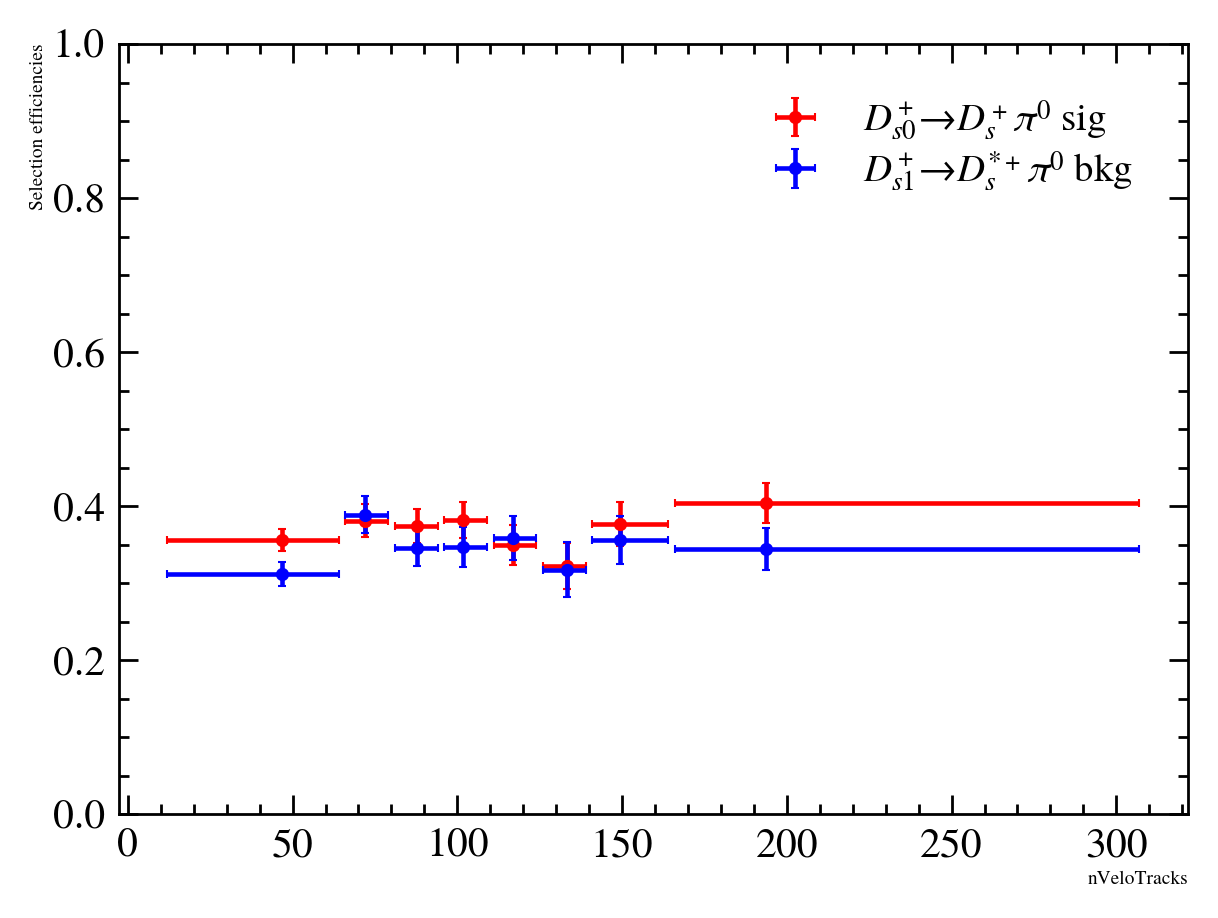

In [9]:
plt.figure()
plt.errorbar(nVT_mean, eff_Ds0, ueff_Ds0, xerr=[nVT_unc_low, nVT_unc_up], fmt='r.', ecolor='red', capsize=3, label=r"$D_{s0}^+ \to D_s^+\pi^0$ sig")
plt.errorbar(nVT_mean, eff_Ds1, ueff_Ds1, xerr=[nVT_unc_low, nVT_unc_up], fmt='b.', ecolor='blue', capsize=3, label=r"$D_{s1}^+ \to D_s^{*+}\pi^0$ bkg")
plt.legend()
plt.xlabel(r"nVeloTracks")
plt.ylabel(r"Selection efficiencies")
plt.ylim(0,1)